In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import norm
import seaborn as sns
import collections

C:\Users\bhati\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [18]:
#read the dataset
dataset = pd.read_csv('Crime_Data_from_2010_to_Present.csv')

#drop the missing values
#dataset.dropna(inplace=True)
#print(len(dataset))

df = pd.DataFrame(dataset, columns = ['Status Description', 'Crime Code 1'])

df2 = pd.DataFrame(dataset, columns = ['Status Description', 'Crime Type'])


In [4]:
juvData = df.loc[dataset['Status Description'].isin(['Juv Arrest','Juv Other'])]
crimeStatus = df2.loc[dataset['Status Description'].isin(['Juv Arrest','Juv Other'])]

In [5]:
j_array = juvData.values
juvData_arr = j_array.flatten()

In [7]:
newJuvData = juvData_arr
newJuvData = np.reshape(juvData_arr, (-1, 2))

In [8]:
for i in range(len(newJuvData)):
    if(newJuvData[i][0] == 'Juv Arrest'):
        newJuvData[i][0] = 1
    else:
        newJuvData[i][0] = 0
        


In [9]:
x = []
y = []
for i in range(len(newJuvData)):
    x.append(newJuvData[i][0])
    y.append(newJuvData[i][1])
n = len(x)

In [10]:
#compute correlation coefficient R
r = np.corrcoef(x,y)
#print (r)
corr_coeff = r[0][1]
print ('Correlation coefficient',corr_coeff)

Correlation coefficient -0.20686659486143952


In [11]:
#Compute test statistics
test_stats = (corr_coeff * np.sqrt(n-2)) / (np.sqrt(1- corr_coeff ** 2))


In [12]:
#Degrees of freedom
df = 2*n - 2

#p-value after comparison with the t
p = 1 - stats.t.cdf(test_stats,df=df)

print ('Test statistics',test_stats)
print ('P value',p)


Test statistics -22.16998901426323
P value 1.0


In [13]:
alpha = 0.05
print ('Set alpha = 0.05')
if p<alpha:
    print ('Reject the null hypothesis.')
else:
    print ('Accept the null hypothesis.')

#plt.scatter(x,y)
#plt.show()

Set alpha = 0.05
Accept the null hypothesis.


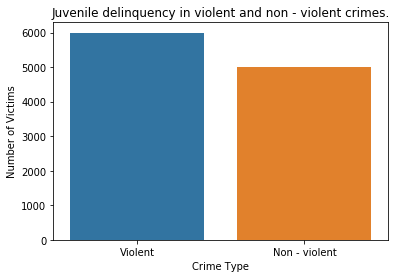

In [19]:
ax = sns.countplot(x="Crime Type", data=crimeStatus)
plt.ylabel('Number of Victims')
plt.title('Juvenile delinquency in violent and non - violent crimes.')
plt.savefig('Juvenile')